In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import csv
import pandas as pd


In [67]:
ex_dir = '/home/jjia/data/lung_function/lung_function/scripts/results/experiments/'
fold1_ct_features_fpath = ex_dir + '3356/test_pred_ct_feature.csv'
fold2_ct_features_fpath = ex_dir + '3357/test_pred_ct_feature.csv'

fold1_pcd_features_fpath = ex_dir + '3356/test_pred_pcd_feature.csv'
fold2_pcd_features_fpath = ex_dir + '3357/test_pred_pcd_feature.csv'

label_fpath = ex_dir + '3356/test_label.csv'

In [71]:
ct_features = pd.read_csv(fold2_pcd_features_fpath, sep=',', header=None)
ct_features = ct_features[:63]  
labels = pd.read_csv(label_fpath, sep=',')
labels_tlc = labels['TLC_He'].to_numpy()

In [74]:
ct_features

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,2.562,2.797,2.232,3.645,1.751,2.592,2.402,2.555,2.094,3.072,...,1.92,2.766,2.021,3.217,2.994,2.451,1.871,1.875,3.549,2.438


In [72]:
n_components = 2
random_state = 0

In [73]:
pca_data = PCA( n_components=n_components, random_state=random_state ).fit_transform(ct_features)

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [63]:
def plot_features(x, y, labels, title):
    fig, ax = plt.subplots()
    im = ax.scatter(x, y, s=100, c=labels, cmap='hot')
    fig.colorbar(im, ax=ax)
    ax.set_title(title)

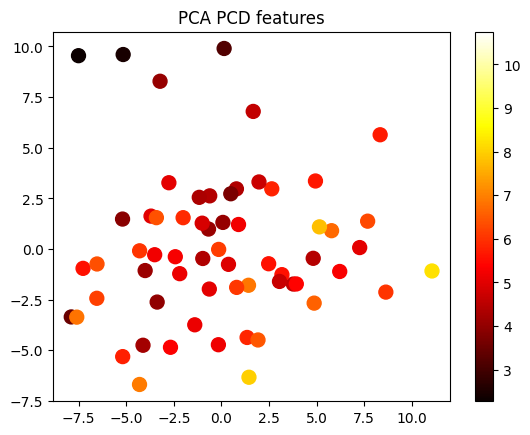

In [64]:

plot_features(pca_data[:,0], pca_data[:,1],labels_tlc, 'PCA PCD features')


In [65]:
tsne_data = TSNE(
    n_components=n_components,
    random_state=random_state,
    n_jobs=2
).fit_transform(ct_features)
 


/home/jjia/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jjia/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


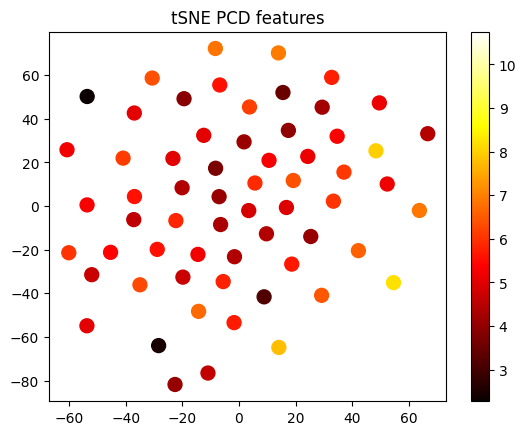

In [66]:
plot_features(tsne_data[:,0], tsne_data[:,1],labels_tlc, 'tSNE PCD features')
